In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.linear_model import SGDRegressor

In [2]:
sns.set(rc={'figure.figsize':(20,20)})

# Focus Points

    Working through our data and understanding it.
    
    Using EDA to see which features to select.
    
    Setting up our data in a way that makes feature selection simple.
    
    Setting up appropriate functions to make our code extensible and reusable.
    
    Commenting code in a meaningful and powerful way.
    
    Properly Scaling our data when we need to.
    
    Properly using CV to ensure that our model is good at predicting our data.
    
    Using analysis to interpret the metrics generated by our CV.

# Import the Training Data Set

In [5]:
df = pd.read_csv('./data/train.csv')

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Let's see how many unique neighborhoods are represented.

In [7]:
len(df['Neighborhood'].value_counts())

25

In [9]:
df['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [10]:
#Setting our series into a Numpy Array
column_as_array = np.array(df['Neighborhood'])

In [16]:
#Reshape the array

column_as_array = column_as_array.reshape(-1,1)

In [27]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)


enc.fit(column_as_array)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [33]:
enc.categories_[0]

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [29]:
#Insert the values and transform them.
one_hot_encoded_neighborhoods = enc.transform(column_as_array)

In [31]:
one_hot_encoded_neighborhoods

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
neighborhoods_one_hot = pd.DataFrame(data=one_hot_encoded_neighborhoods,columns=enc.categories_[0])

In [36]:
neighborhoods_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
neighborhoods_one_hot['SalePrice'] = df['SalePrice']

In [38]:
neighborhoods_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


In [39]:
neighborhoods_one_hot.corr()['SalePrice']

Blmngtn      0.019066
Blueste     -0.020250
BrDale      -0.101303
BrkSide     -0.143648
ClearCr      0.055718
CollgCr      0.072626
Crawfor      0.071160
Edwards     -0.179949
Gilbert      0.035940
IDOTRR      -0.164056
MeadowV     -0.112544
Mitchel     -0.057845
NAmes       -0.188513
NPkVill     -0.037910
NWAmes       0.023483
NoRidge      0.330424
NridgHt      0.402149
OldTown     -0.192189
SWISU       -0.063705
Sawyer      -0.128394
SawyerW      0.014560
Somerst      0.140058
StoneBr      0.215363
Timber       0.126236
Veenker      0.063471
SalePrice    1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

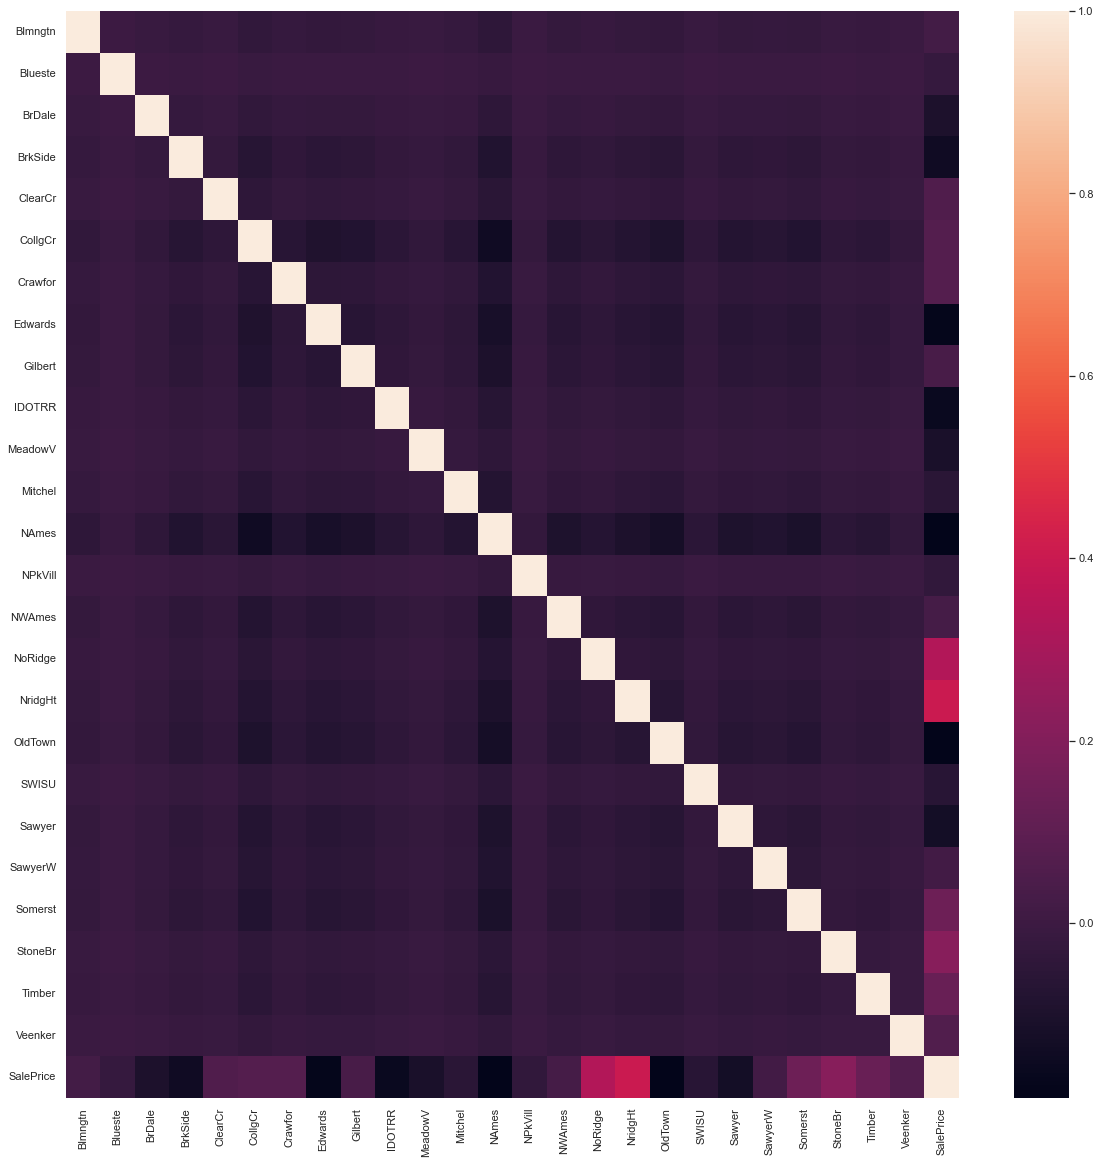

In [41]:
sns.heatmap(neighborhoods_one_hot.corr())

# Let's build out our Regression

In [45]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot['SalePrice'])

LinearRegression()

In [46]:
reg.score(neighborhoods_one_hot.drop(columns=['SalePrice'],axis=1).values,neighborhoods_one_hot['SalePrice'])

0.5454853236590955

In [50]:
enc.categories_[0].tolist()

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

In [51]:
def create_neighborhood_dummy(neighborhood_name):
    
    list_of_neighborhoods = enc.categories_[0].tolist()
    
    index_of_neighborhood = list_of_neighborhoods.index(neighborhood_name)
    
    array_to_return = []
    
    for i in range(0,25):
        if i == index_of_neighborhood:
            array_to_return.append(1)
        else:
            array_to_return.append(0)
    return np.array(array_to_return).reshape(1,-1)

In [54]:
create_neighborhood_dummy('ClearCr')

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [57]:
reg.predict(create_neighborhood_dummy('NoRidge'))

array([336640.])

In [58]:
reg.predict(create_neighborhood_dummy('Edwards'))

array([127040.])

# Let's add LotArea

In [59]:
neighborhoods_one_hot_with_lot_area = neighborhoods_one_hot.copy()

In [60]:
neighborhoods_one_hot_with_lot_area['LotArea'] = df['LotArea']

In [62]:
neighborhoods_one_hot_with_lot_area

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice,LotArea
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,8450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500,9600
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500,11250
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000,9550
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000,7917
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000,13175
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500,9042
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125,9717


In [66]:
neighborhoods_one_hot_with_lot_area.corr()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice,LotArea
Blmngtn,1.000000,-0.004020,-0.011425,-0.022077,-0.015177,-0.036728,-0.020650,-0.029432,-0.025960,-0.017502,...,-0.031437,-0.014326,-0.025080,-0.022274,-0.027155,-0.014326,-0.017743,-0.009457,0.019066,-0.077438
Blueste,-0.004020,1.000000,-0.003899,-0.007533,-0.005179,-0.012533,-0.007046,-0.010043,-0.008858,-0.005972,...,-0.010727,-0.004889,-0.008558,-0.007601,-0.009266,-0.004889,-0.006054,-0.003227,-0.020250,-0.033006
BrDale,-0.011425,-0.003899,1.000000,-0.021410,-0.014719,-0.035619,-0.020027,-0.028543,-0.025176,-0.016974,...,-0.030488,-0.013894,-0.024323,-0.021601,-0.026335,-0.013894,-0.017208,-0.009171,-0.101303,-0.091949
BrkSide,-0.022077,-0.007533,-0.021410,1.000000,-0.028441,-0.068826,-0.038696,-0.055153,-0.048647,-0.032797,...,-0.058911,-0.026846,-0.046997,-0.041739,-0.050886,-0.026846,-0.033249,-0.017722,-0.143648,-0.064342
ClearCr,-0.015177,-0.005179,-0.014719,-0.028441,1.000000,-0.047317,-0.026603,-0.037917,-0.033444,-0.022548,...,-0.040501,-0.018457,-0.032310,-0.028696,-0.034984,-0.018457,-0.022859,-0.012183,0.055718,0.285316
CollgCr,-0.036728,-0.012533,-0.035619,-0.068826,-0.047317,1.000000,-0.064378,-0.091757,-0.080933,-0.054564,...,-0.098009,-0.044664,-0.078189,-0.069441,-0.084658,-0.044664,-0.055316,-0.029483,0.072626,-0.030444
Crawfor,-0.020650,-0.007046,-0.020027,-0.038696,-0.026603,-0.064378,1.000000,-0.051589,-0.045504,-0.030678,...,-0.055104,-0.025112,-0.043961,-0.039042,-0.047598,-0.025112,-0.031101,-0.016576,0.071160,0.024652
Edwards,-0.029432,-0.010043,-0.028543,-0.055153,-0.037917,-0.091757,-0.051589,1.000000,-0.064856,-0.043725,...,-0.078539,-0.035791,-0.062656,-0.055646,-0.067840,-0.035791,-0.044327,-0.023626,-0.179949,-0.008103
Gilbert,-0.025960,-0.008858,-0.025176,-0.048647,-0.033444,-0.080933,-0.045504,-0.064856,1.000000,-0.038567,...,-0.069274,-0.031569,-0.055265,-0.049082,-0.059837,-0.031569,-0.039098,-0.020839,0.035940,0.020670
IDOTRR,-0.017502,-0.005972,-0.016974,-0.032797,-0.022548,-0.054564,-0.030678,-0.043725,-0.038567,1.000000,...,-0.046704,-0.021283,-0.037259,-0.033091,-0.040342,-0.021283,-0.026360,-0.014049,-0.164056,-0.038910


<AxesSubplot:>

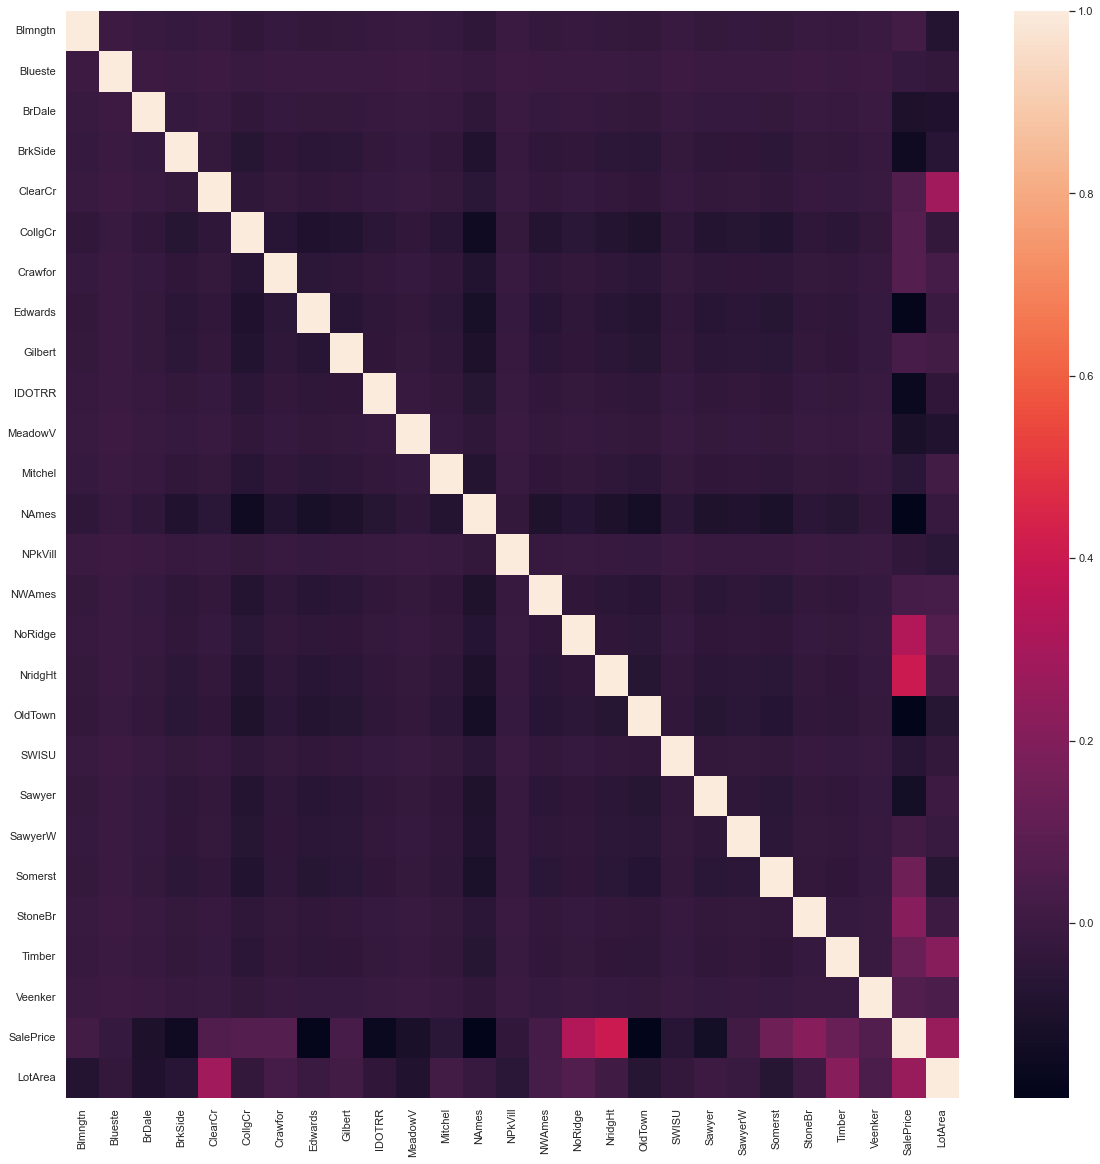

In [67]:
sns.heatmap(neighborhoods_one_hot_with_lot_area.corr())

In [68]:
neighborhoods_one_hot_with_lot_area.corr()['LotArea']

Blmngtn     -0.077438
Blueste     -0.033006
BrDale      -0.091949
BrkSide     -0.064342
ClearCr      0.285316
CollgCr     -0.030444
Crawfor      0.024652
Edwards     -0.008103
Gilbert      0.020670
IDOTRR      -0.038910
MeadowV     -0.089123
Mitchel      0.020684
NAmes       -0.016124
NPkVill     -0.057221
NWAmes       0.030277
NoRidge      0.063068
NridgHt      0.008776
OldTown     -0.067048
SWISU       -0.031606
Sawyer      -0.001333
SawyerW     -0.012197
Somerst     -0.067096
StoneBr      0.002052
Timber       0.215400
Veenker      0.044440
SalePrice    0.263843
LotArea      1.000000
Name: LotArea, dtype: float64

# Let's Check the distribution

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

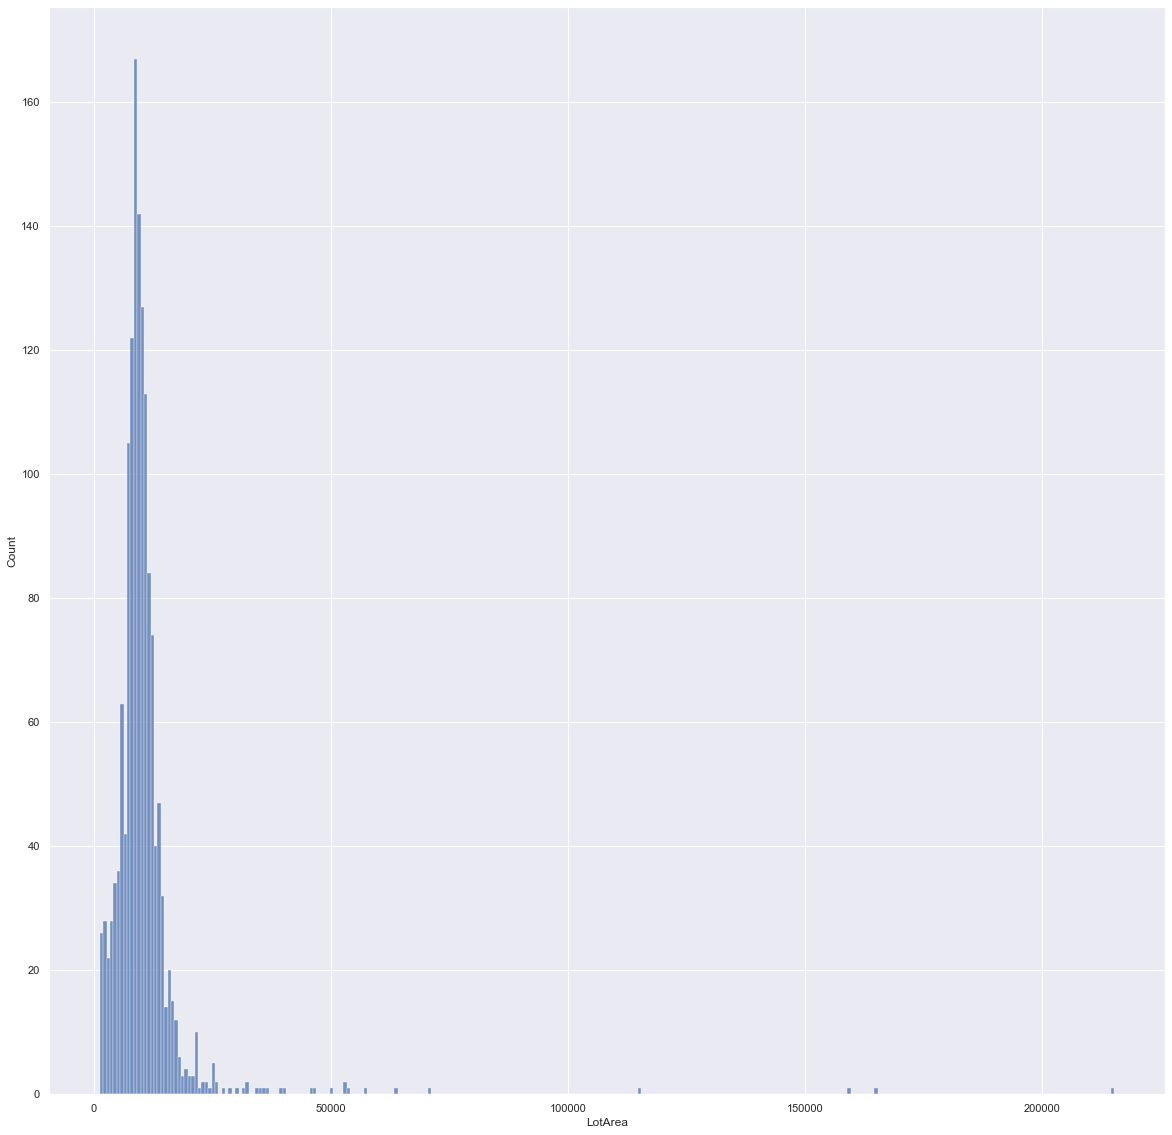

In [70]:
sns.histplot(data=neighborhoods_one_hot_with_lot_area['LotArea'])

<AxesSubplot:>

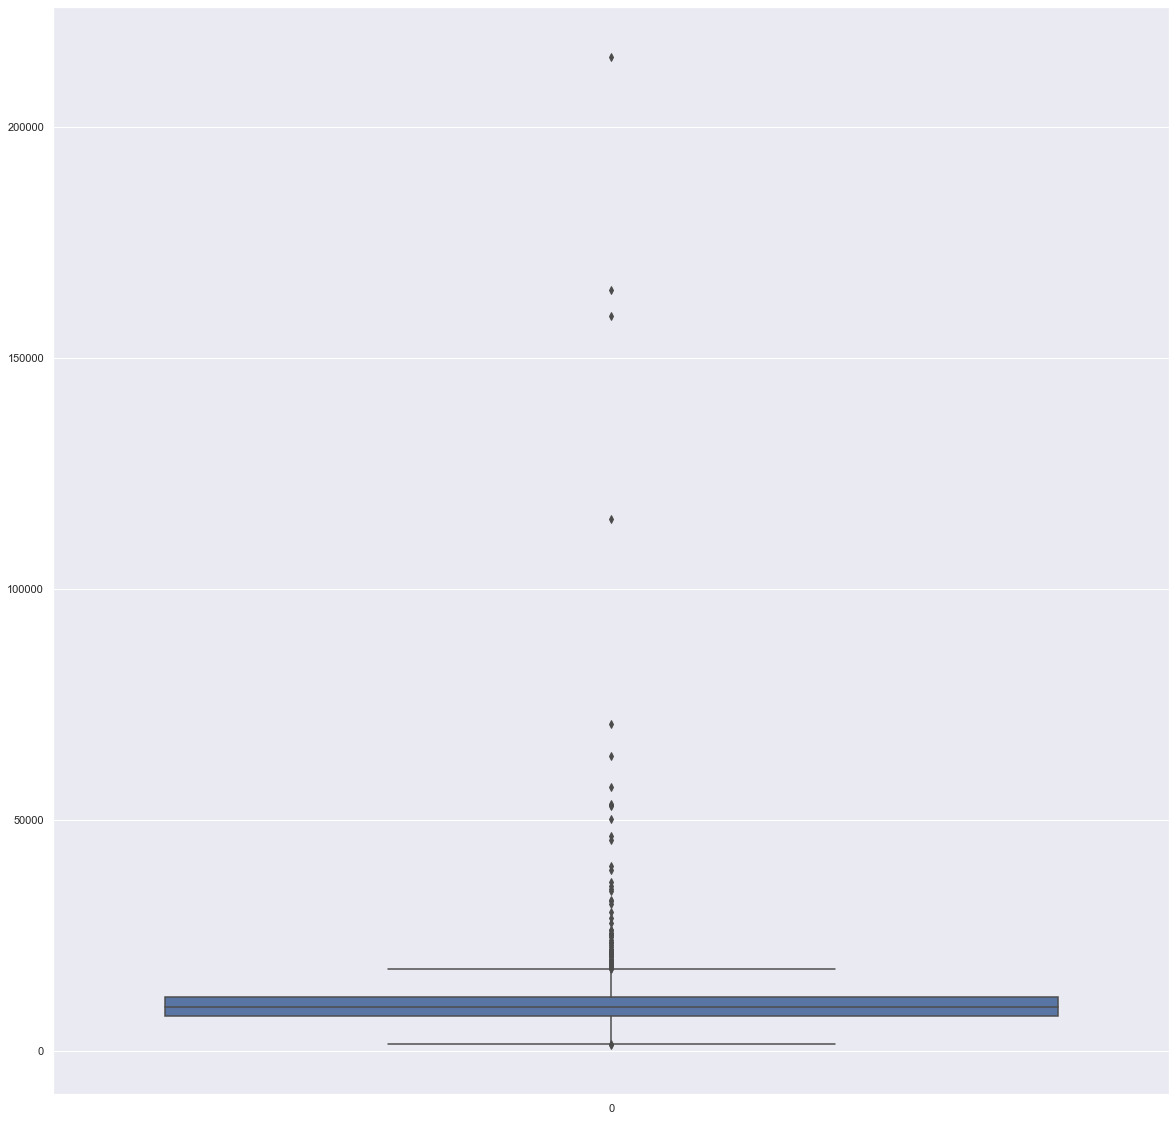

In [72]:
sns.boxplot(data=neighborhoods_one_hot_with_lot_area['LotArea'])

In [86]:
Q1 = neighborhoods_one_hot_with_lot_area['LotArea'].quantile(.25,interpolation='midpoint')
Q3 = neighborhoods_one_hot_with_lot_area['LotArea'].quantile(.75,interpolation='midpoint')
IQR = Q3-Q1

In [87]:
upperlimit = Q3+(1.5*IQR)
lowerlimit = Q1-(1.5*IQR)

In [88]:
filtered_df = neighborhoods_one_hot_with_lot_area.loc[(neighborhoods_one_hot_with_lot_area['LotArea']>lowerlimit) & (neighborhoods_one_hot_with_lot_area['LotArea']<upperlimit)]

In [89]:
filtered_df

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice,LotArea
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,8450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500,9600
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500,11250
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000,9550
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000,7917
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000,13175
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500,9042
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125,9717


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

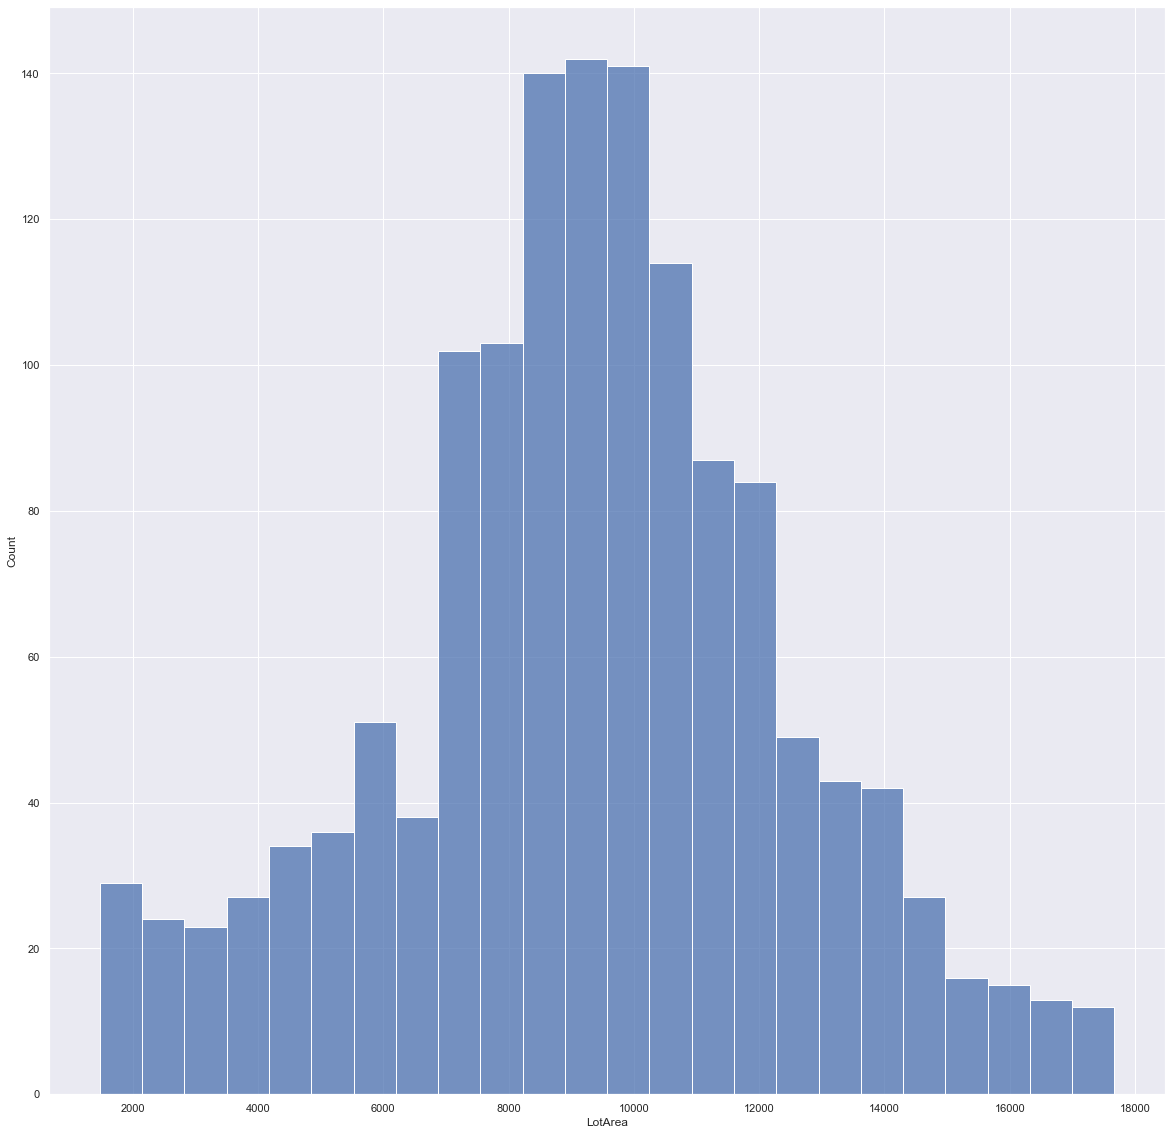

In [90]:
sns.histplot(data=filtered_df['LotArea'])

# Let's build a model that does not take into account lotArea outliers

In [92]:
reg = linear_model.LinearRegression()
reg.fit(filtered_df.drop(labels='SalePrice',axis=1),filtered_df['SalePrice'])
reg.score(filtered_df.drop(labels='SalePrice',axis=1),filtered_df['SalePrice'])

0.6473809617413522

In [94]:
reg = linear_model.LinearRegression()
reg.fit(filtered_df.drop(labels='SalePrice',axis=1),filtered_df['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])

-0.10396463290704006

# Let's try removing only a few outliers

In [100]:
few_outliers_removed = neighborhoods_one_hot_with_lot_area.loc[neighborhoods_one_hot_with_lot_area['LotArea']<100000]

c:\users\axlcr\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

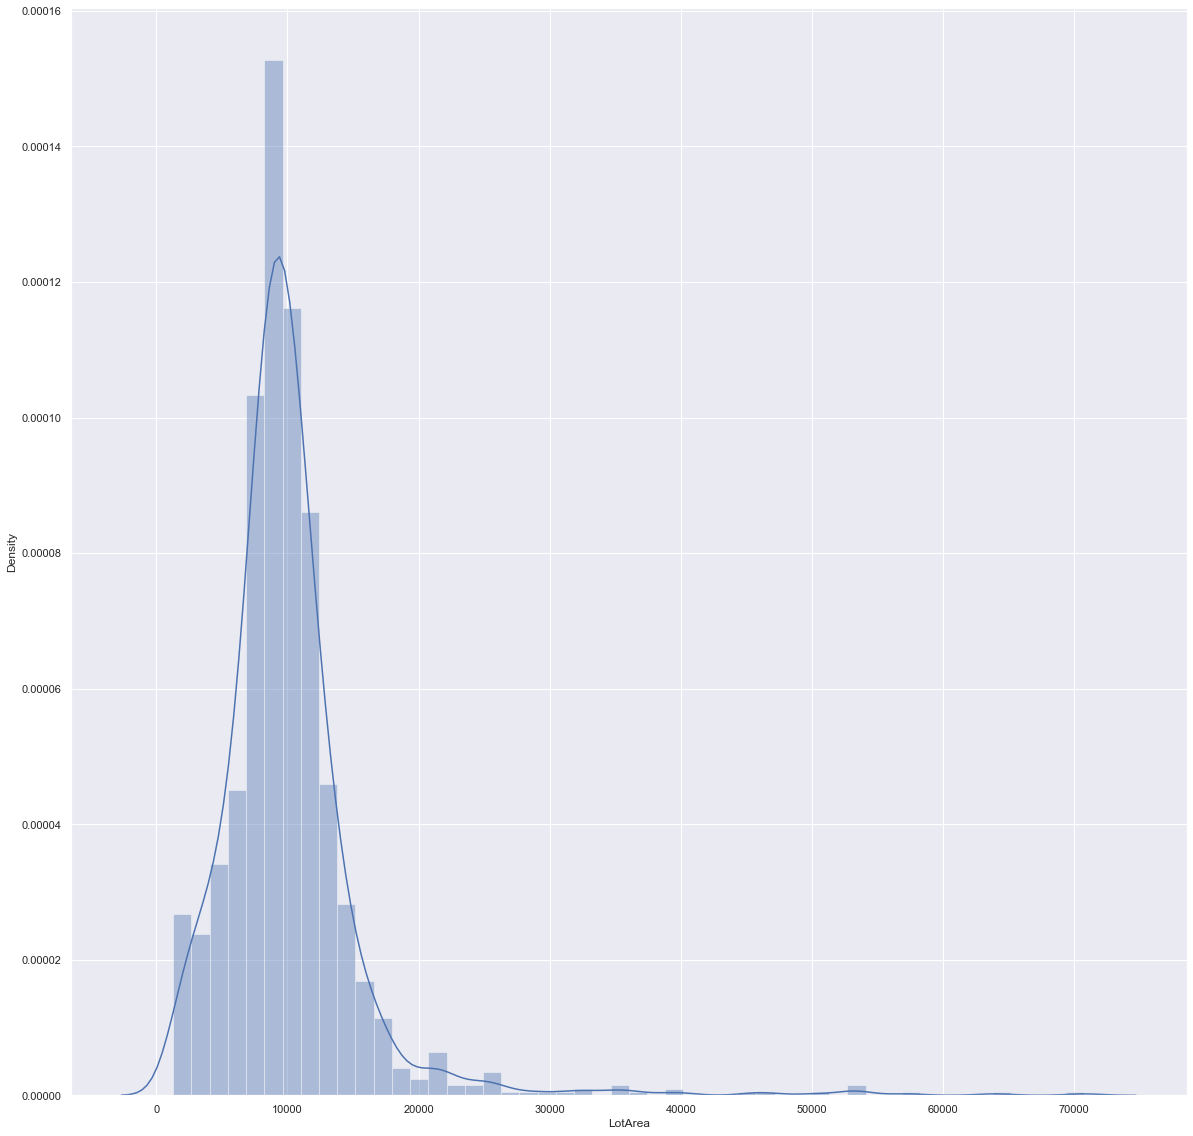

In [103]:
sns.distplot(few_outliers_removed['LotArea'])

In [104]:
reg = linear_model.LinearRegression()
reg.fit(few_outliers_removed.drop(labels='SalePrice',axis=1),few_outliers_removed['SalePrice'])
reg.score(few_outliers_removed.drop(labels='SalePrice',axis=1),few_outliers_removed['SalePrice'])


0.600723503868775

In [105]:
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])

0.4957297991825489

# Let's build a model that keeps the outliers in place

In [106]:
reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])

0.5730455761088944

In [110]:
replacement_values = np.log(neighborhoods_one_hot_with_lot_area['LotArea'].values)

c:\users\axlcr\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

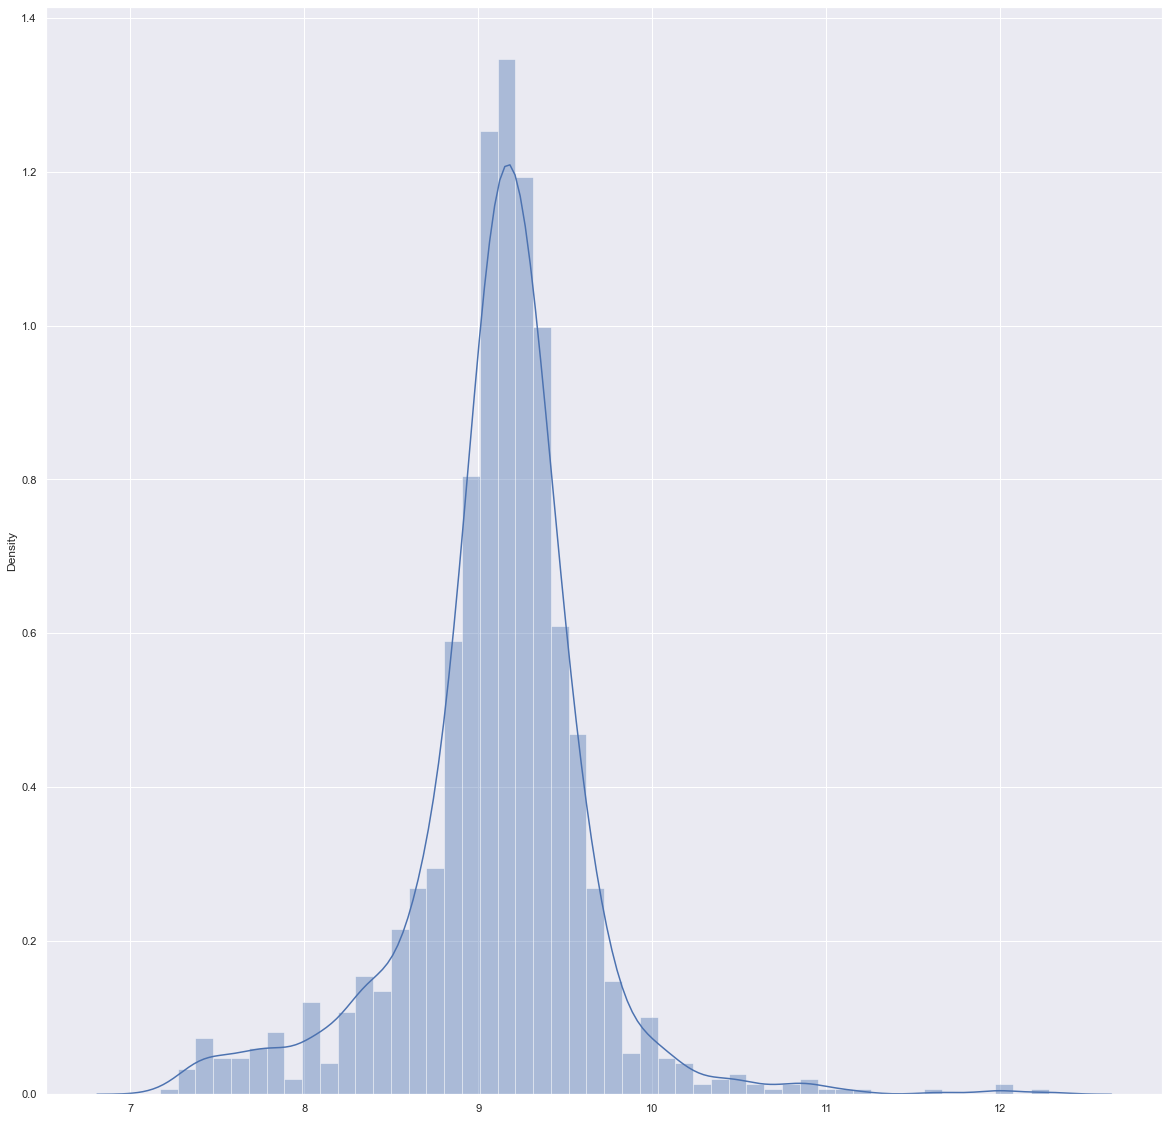

In [111]:
sns.distplot(replacement_values)

In [112]:
neighborhoods_one_hot_with_lot_area.drop(columns=['LotArea'],inplace=True)

In [114]:
neighborhoods_one_hot_with_lot_area['LotArea']=replacement_values

In [115]:
reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])

LinearRegression()

In [116]:
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1),neighborhoods_one_hot_with_lot_area['SalePrice'])

0.6256212740575855

In [117]:
test_df = pd.read_csv('./data/test.csv')

In [122]:
#Prepare Column for One Hot Encoding
column_as_array = np.array(test_df['Neighborhood'])

#Reshape the column to be one hot encoded
column_as_array = column_as_array.reshape(-1,1)

#Initialize our encoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

#fit the column
enc.fit(column_as_array)

#Call the transformation on the column
one_hot_encoded_test_array = enc.transform(column_as_array)

#Build out our dataframe from the onehotencoded column
neighborhoods_one_hot_test = pd.DataFrame(data=one_hot_encoded_test_array,columns=enc.categories_[0])

#Create a new instance of the old dataframe
neighborhoods_one_hot_with_lotArea_test = neighborhoods_one_hot_test.copy()

#Add the LotArea Column into the DF
neighborhoods_one_hot_with_lotArea_test['LotArea'] = test_df['LotArea']

#log transform lot area
replacement_values = np.log(neighborhoods_one_hot_with_lotArea_test['LotArea'].values)

#Drop the old LotArea column

neighborhoods_one_hot_with_lotArea_test.drop(columns=['LotArea'],inplace=True)

#Add the new LotArea Column

neighborhoods_one_hot_with_lotArea_test['LotArea']=replacement_values



In [123]:
predictions = reg.predict(neighborhoods_one_hot_with_lotArea_test)

In [124]:
predictions

array([156000., 167936., 207536., ..., 194016., 156128., 151408.])

In [126]:
neighborhoods_one_hot_with_lotArea_test['SalePrice'] = predictions

In [127]:
neighborhoods_one_hot_with_lotArea_test

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,LotArea,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.360655,156000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.565704,167936.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.534595,207536.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.208138,188512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.518193,278880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.568379,91696.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.546446,90416.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.903488,194016.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.253496,156128.0


In [129]:
neighborhoods_one_hot_with_lotArea_test['Id'] = test_df['Id']

In [130]:
neighborhoods_one_hot_with_lotArea_test

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,LotArea,SalePrice,Id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.360655,156000.0,1461
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.565704,167936.0,1462
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.534595,207536.0,1463
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.208138,188512.0,1464
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.518193,278880.0,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.568379,91696.0,2915
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.546446,90416.0,2916
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.903488,194016.0,2917
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.253496,156128.0,2918


In [131]:
to_csv = neighborhoods_one_hot_with_lotArea_test[['Id','SalePrice']]

In [132]:
to_csv

,Id,SalePrice
0,1461,156000.0
1,1462,167936.0
2,1463,207536.0
3,1464,188512.0
4,1465,278880.0
...,...,...
1454,2915,91696.0
1455,2916,90416.0
1456,2917,194016.0
1457,2918,156128.0


In [134]:
to_csv.to_csv(r'C:\Users\axlcr\Desktop\export_dataframe.csv',index=False,header=True)